In [1]:
from get_data import generate_cell_data

generate_cell_data()

100% [........................................................................] 16339802 / 16339802

In [5]:
import torch
from base.gpu_test import get_device
from base import FCRNA

#Getting GPU for training

device = get_device()

criterion = torch.nn.MSELoss()
criterion = criterion.cuda()

model = FCRNA.FCRN_A(criterion, input_filters=3,
                            filters=64,
                            N=2)
model = model.cuda()

optimizer = torch.optim.SGD(
      model.parameters(),
      0.025,
      momentum=0.9,
      weight_decay=3e-4)

Using device: cuda

GeForce RTX 3070
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [6]:
from statistics import mean
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from tqdm.autonotebook import tqdm

def train_model(train_queue, mdoel, criterion, optimizer):
    print("Training: ")
    true_values = []
    predicted_values = []
    loss_vals = []
    
    for image, label in tqdm(train_queue):

        model.train()

        image = image.cuda()
        label = label.cuda()

        optimizer.zero_grad()

        logits = model(image)[0]
        
        
        loss = criterion(logits, label)
        
        
        loss.backward()
        torch.nn.utils.clip_grad_norm(model.parameters(), 5)
        optimizer.step()
        loss_vals.append(loss.item())

        for true, predicted in zip(label, logits):

            true_counts = torch.sum(true).item() / 100
            predicted_counts = torch.sum(predicted).item() / 100

            # update current epoch results
            true_values.append(true_counts)
            predicted_values.append(predicted_counts)

    
    print("Mean Loss: ", mean(loss_vals))
    print("MAE: ", mean_absolute_error(true_values, predicted_values))
    print("MSE: ", mean_squared_error(true_values, predicted_values))
    plot(true_values, predicted_values, "Train")



def validate_model(valid_queue, model, criterion):
    
    print("Validation: ")
    
    true_values = []
    predicted_values = []
    loss_vals = []
    
    for image, label in tqdm(valid_queue):
        image = Variable(image, volatile=True).cuda()
        label = Variable(label, volatile=True).cuda()
        
        logits = model(image)[0]
        
        
        loss = criterion(logits, label)
        
        loss_vals.append(loss.item())
        
        for true, predicted in zip(label, logits):

            true_counts = torch.sum(true).item() / 100
            predicted_counts = torch.sum(predicted).item() / 100

            # update current epoch results
            true_values.append(true_counts)
            predicted_values.append(predicted_counts)
        
    
    print("Mean Loss: ", mean(loss_vals))
    print("MAE: ", mean_absolute_error(true_values, predicted_values))
    print("MSE: ", mean_squared_error(true_values, predicted_values))
    plot(true_values, predicted_values, "Validation")

In [7]:
import matplotlib.pyplot as plt

def plot(true_values, predicted_values, title):
    """Plot true vs predicted counts and loss."""
   

    fig = plt.figure()
    plt.scatter(true_values, predicted_values)

    plt.title(title)
    plt.xlabel('True value')
    plt.ylabel('Predicted value')
    plt.show()
    

Epoch:  0
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.7282740585009257
MAE:  44.37689557291666
MSE:  3142.0574761178555


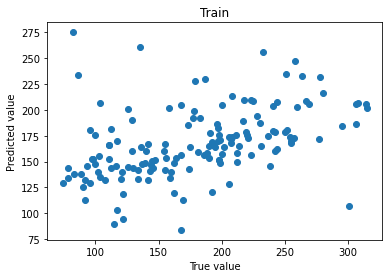

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  1.725888831615448
MAE:  31.806362207031253
MSE:  1504.0939271728976


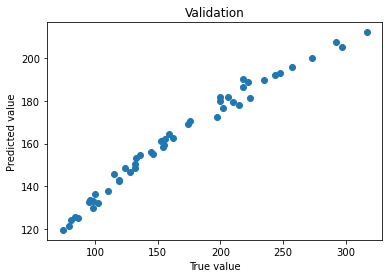

Epoch:  1
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.3811207421620686
MAE:  30.54422194010417
MSE:  1490.7913833674818


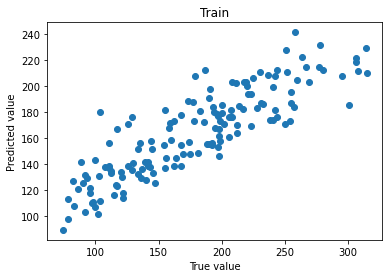

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  1.0271255427598953
MAE:  25.445081640625002
MSE:  1277.2503524070023


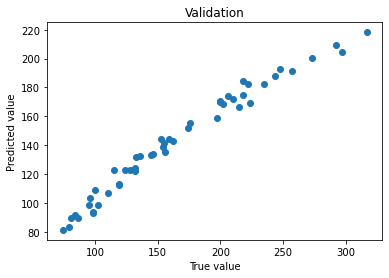

Epoch:  2
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.2627123063802719
MAE:  24.35357819010417
MSE:  1011.1069820180735


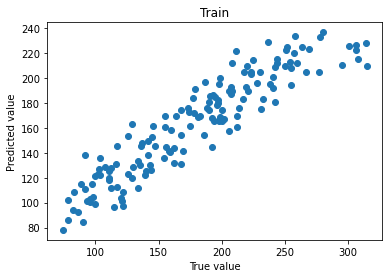

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.9713059157133103
MAE:  24.026198046875002
MSE:  1128.7515851103315


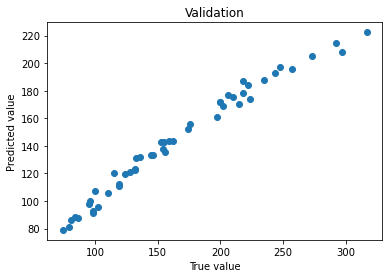

Epoch:  3
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.160194514989853
MAE:  22.880848795572913
MSE:  892.656949599041


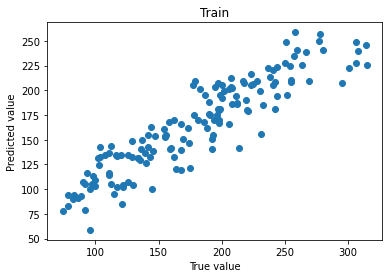

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.792781879901886
MAE:  25.526496386718744
MSE:  934.203740797626


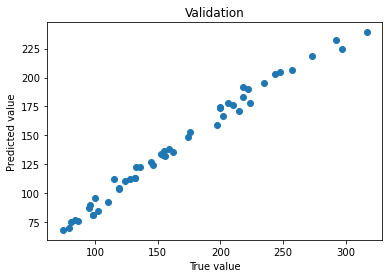

Epoch:  4
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.150982749859492
MAE:  20.661053580729167
MSE:  697.849152099014


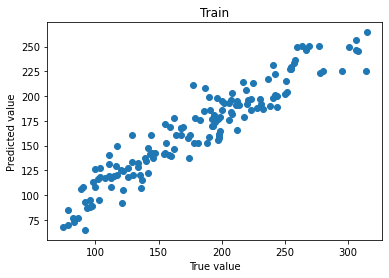

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  1.1249989974498749
MAE:  31.800488574218754
MSE:  1243.73717319978


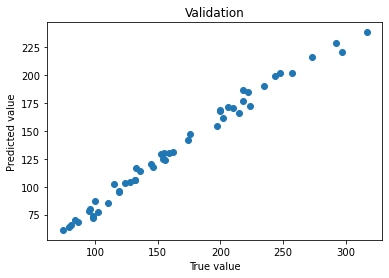

Epoch:  5
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.0660658844312032
MAE:  17.011831738281252
MSE:  496.57714164716


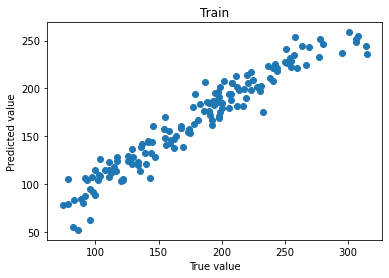

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  1.3443513715267181
MAE:  9.59539228515625
MSE:  220.26822657698492


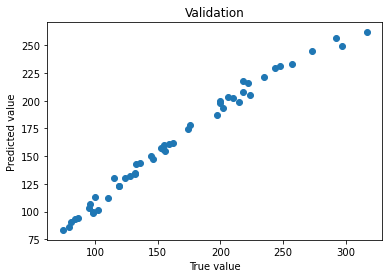

Epoch:  6
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.0240947059790293
MAE:  16.56258020833333
MSE:  494.14318646020166


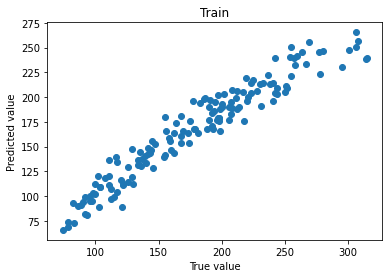

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  1.5555867385864257
MAE:  16.62943681640625
MSE:  442.51199175871443


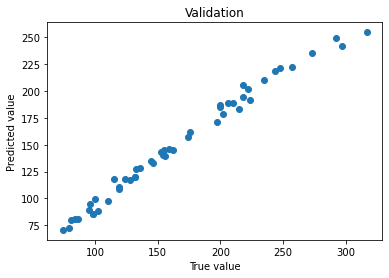

Epoch:  7
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  1.0532665824890137
MAE:  17.2912080078125
MSE:  540.5106262460675


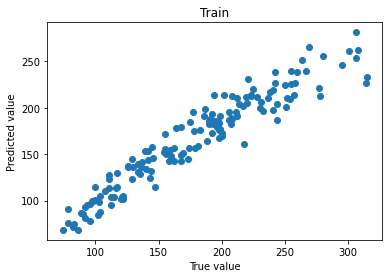

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  1.0219003635644912
MAE:  9.106789941406252
MSE:  212.29954970247326


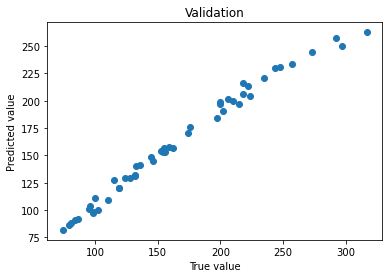

Epoch:  8
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9824652101596196
MAE:  14.205937565104168
MSE:  376.24687831325434


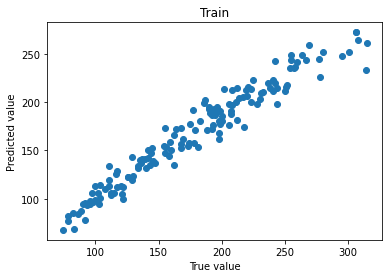

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.6986237156391144
MAE:  17.051045703125002
MSE:  431.5030025215711


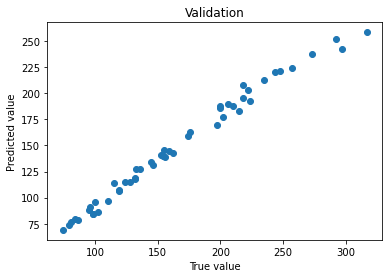

Epoch:  9
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9473408246040345
MAE:  13.215919108072917
MSE:  296.08384400325224


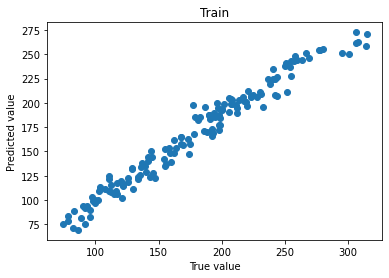

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.6786616450548172
MAE:  18.62329228515625
MSE:  452.14724095400385


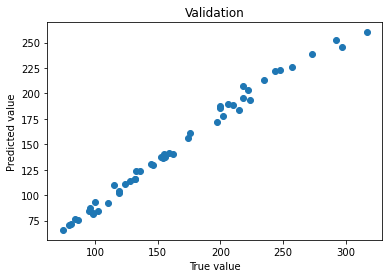

Epoch:  10
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.949767720301946
MAE:  15.019586946614584
MSE:  361.963904068549


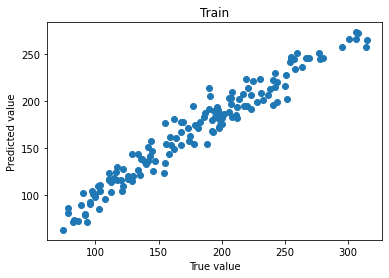

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.6576538294553756
MAE:  8.206375488281251
MSE:  165.89361140376712


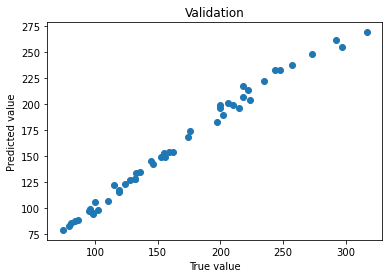

Epoch:  11
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9579896771907807
MAE:  14.004347428385415
MSE:  386.16970531012106


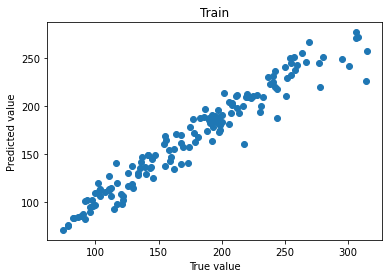

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7139482808113098
MAE:  8.072826660156249
MSE:  157.35472018025249


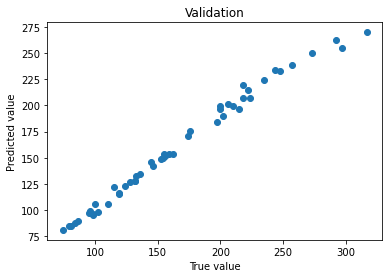

Epoch:  12
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9229534589250883
MAE:  12.3306361328125
MSE:  275.14056152547266


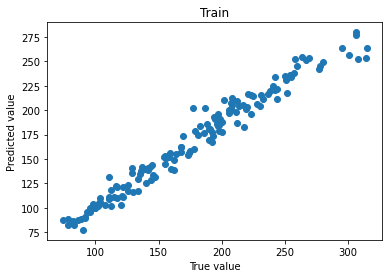

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.888928552865982
MAE:  27.857958691406246
MSE:  956.9989854812626


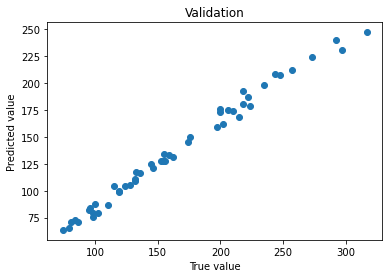

Epoch:  13
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.9205451314647992
MAE:  12.924551236979168
MSE:  300.5798759226059


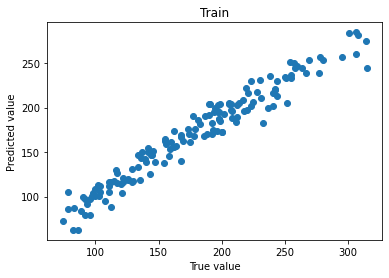

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7273889636993408
MAE:  6.62493642578125
MSE:  98.07895480472618


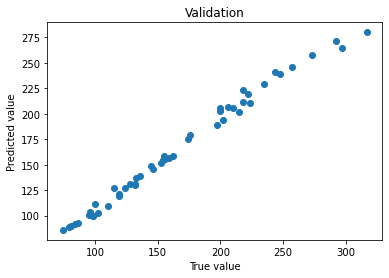

Epoch:  14
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8530160937706629
MAE:  11.568955924479168
MSE:  231.52806241938717


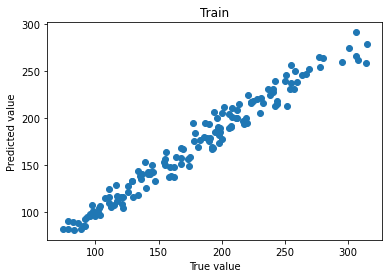

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.6143867221474647
MAE:  12.73258330078125
MSE:  300.68929733282044


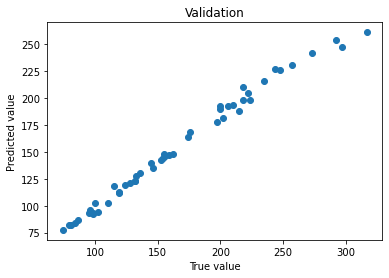

Epoch:  15
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8605171532432239
MAE:  11.532604296875
MSE:  240.85761746486824


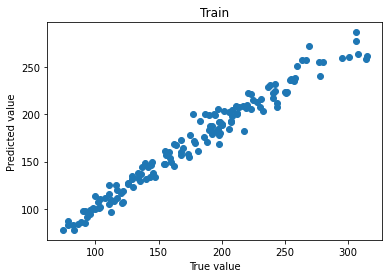

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7492388153076172
MAE:  12.7522890625
MSE:  283.59976724202636


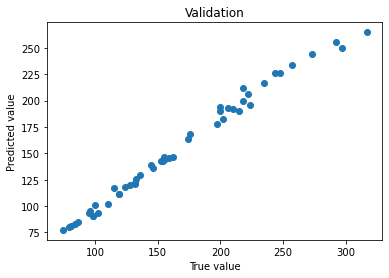

Epoch:  16
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8194333793719609
MAE:  11.179241276041667
MSE:  213.3974259877596


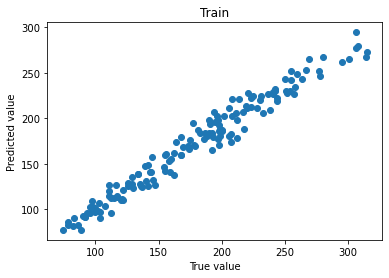

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  1.1719628965854645
MAE:  6.702840039062498
MSE:  94.94488192958164


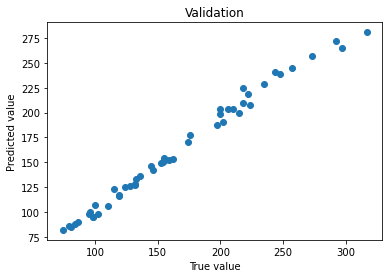

Epoch:  17
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.8210741020242374
MAE:  11.271987044270833
MSE:  210.35312885888987


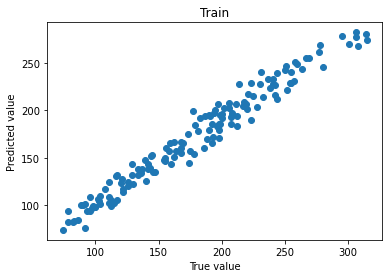

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.6981632387638093
MAE:  11.43311748046875
MSE:  245.78930550776147


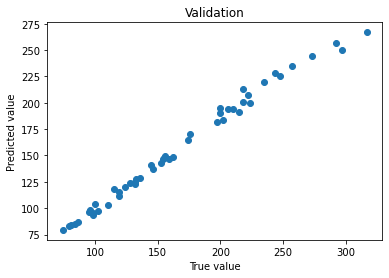

Epoch:  18
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.7980271523197492
MAE:  10.357073632812499
MSE:  186.84268963081038


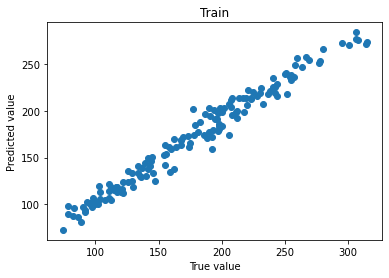

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.5945797425508499
MAE:  12.045941210937501
MSE:  234.4534741991816


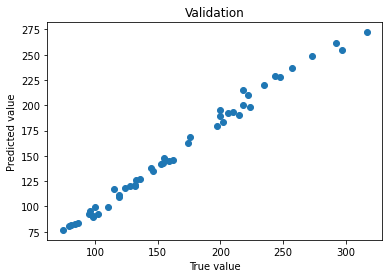

Epoch:  19
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.7840039565165837
MAE:  11.197440462239582
MSE:  204.16516121426793


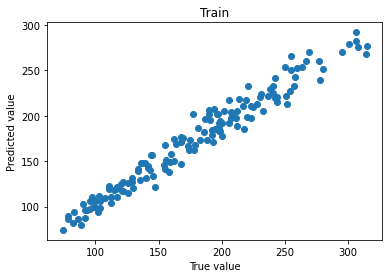

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.8516654920578003
MAE:  10.966202050781247
MSE:  206.60100690299268


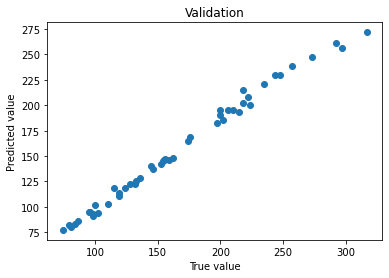

Epoch:  20
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.7439342544476191
MAE:  8.668884895833331
MSE:  140.7566083242505


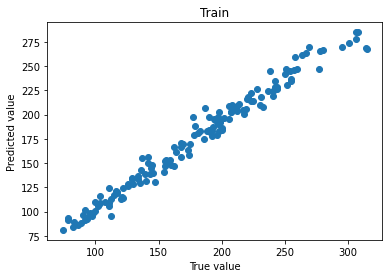

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.8748764711618423
MAE:  5.9172528320312505
MSE:  77.44954010662889


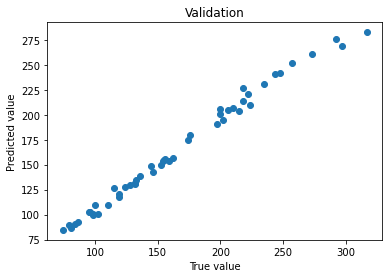

Epoch:  21
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.6988084531823794
MAE:  8.635087760416669
MSE:  127.61451683174771


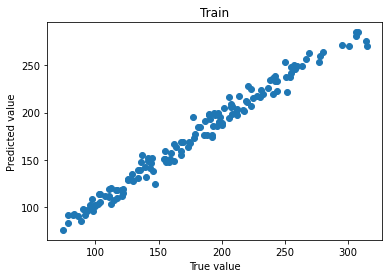

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  1.1578490436077118
MAE:  7.27029462890625
MSE:  109.0570032356038


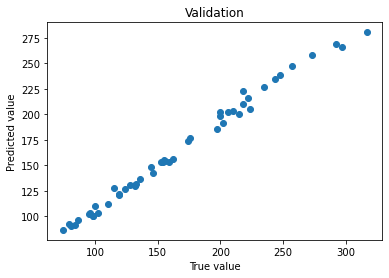

Epoch:  22
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.6439797572294871
MAE:  9.34070791015625
MSE:  151.51497408904282


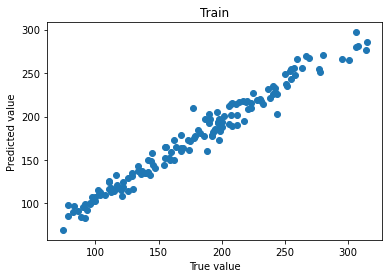

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.8868551278114318
MAE:  7.1048648437500015
MSE:  102.37614984328748


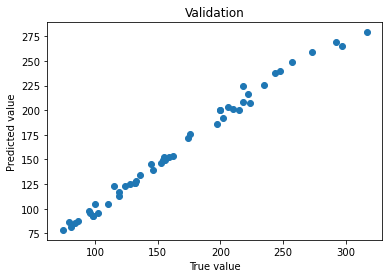

Epoch:  23
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.6190646876891454
MAE:  8.495291666666668
MSE:  119.35292981050523


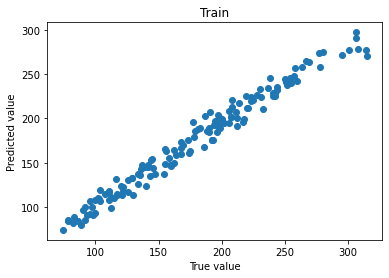

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.6721928602457047
MAE:  8.499634082031251
MSE:  133.27240567524777


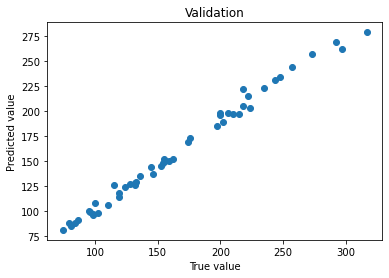

Epoch:  24
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.6131508886814118
MAE:  9.131675
MSE:  134.9008491316948


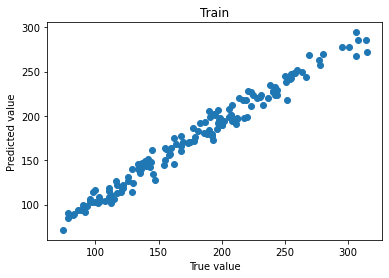

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7094222807884216
MAE:  14.01415537109375
MSE:  256.89193310556266


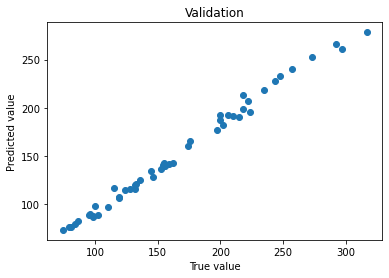

Epoch:  25
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.5746596684058507
MAE:  7.6598945638020846
MSE:  105.42589214057108


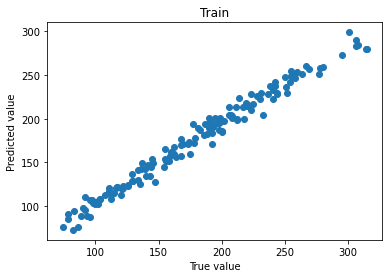

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.6019350820779801
MAE:  8.961891503906251
MSE:  125.9442229761033


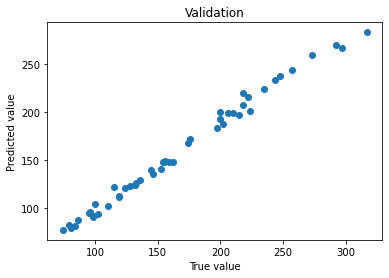

Epoch:  26
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.5542515586813291
MAE:  8.8300291015625
MSE:  128.49571636563394


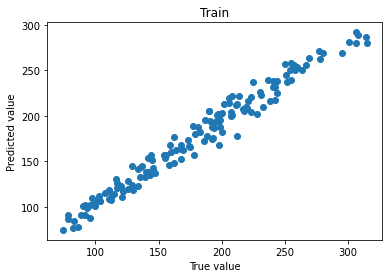

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.8876882034540177
MAE:  7.002895703125003
MSE:  81.23289833785161


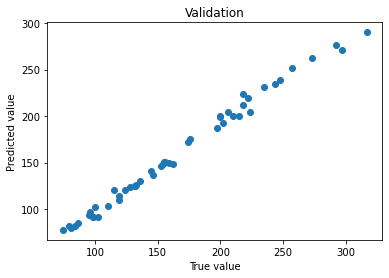

Epoch:  27
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.5465025053421656
MAE:  8.445394726562501
MSE:  117.62094365315977


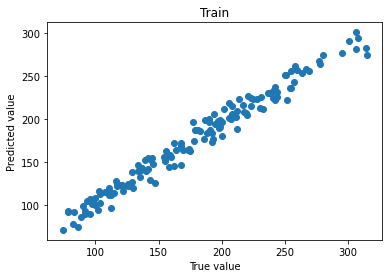

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.6626850500702858
MAE:  5.160640234374999
MSE:  50.68261204327107


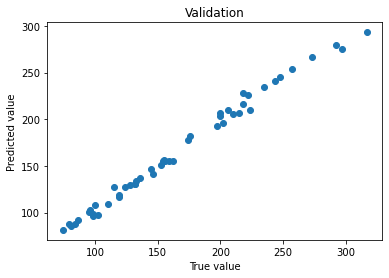

Epoch:  28
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.5205300077795982
MAE:  8.235740625000002
MSE:  113.75114441159948


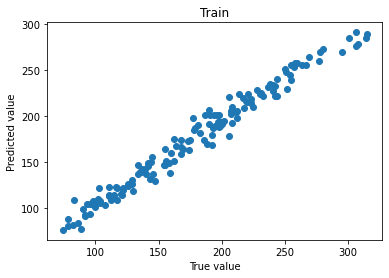

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.6682723546028138
MAE:  9.10028056640625
MSE:  145.38707868413402


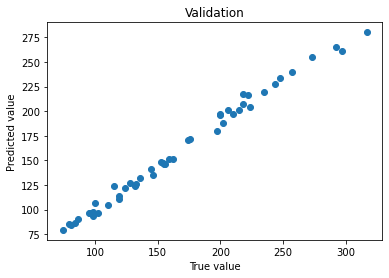

Epoch:  29
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.5014265884955724
MAE:  7.433661230468749
MSE:  106.09561829485018


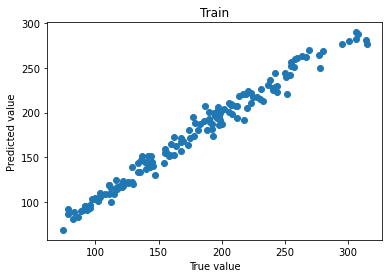

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.5852948978543282
MAE:  10.6467310546875
MSE:  162.93702411549094


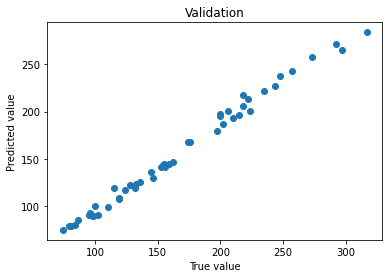

Epoch:  30
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.4779707078138987
MAE:  8.976697493489583
MSE:  131.98921408885337


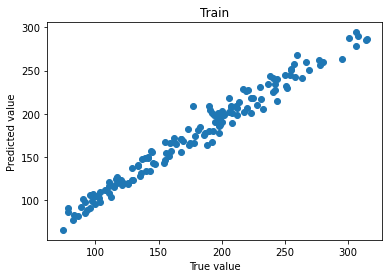

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7037950801849365
MAE:  6.178346484374999
MSE:  68.56737348278521


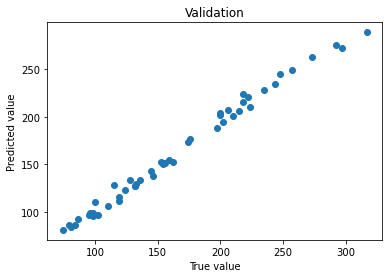

Epoch:  31
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.4100685712695122
MAE:  6.404186132812502
MSE:  72.2736544267241


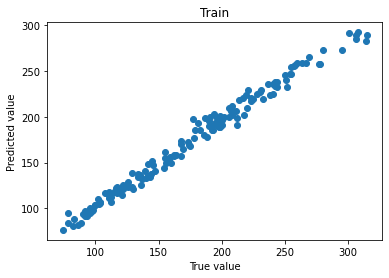

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7610130900144577
MAE:  5.655883203124998
MSE:  54.3776837505083


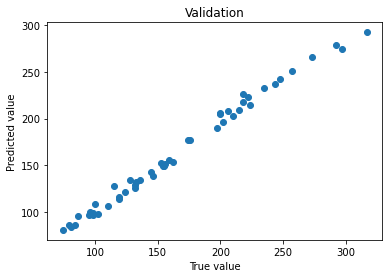

Epoch:  32
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.3999490004777908
MAE:  6.626277799479166
MSE:  76.89144999234453


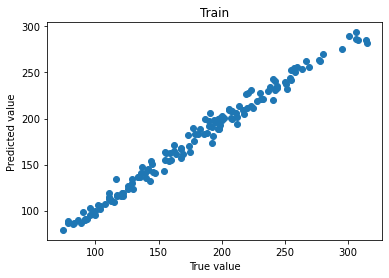

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  1.0535779231786728
MAE:  6.532757910156252
MSE:  75.10070773168233


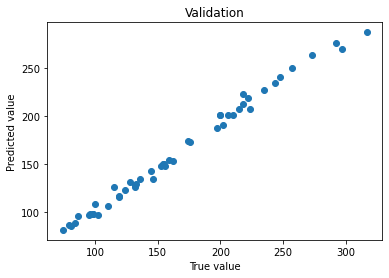

Epoch:  33
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.431064536968867
MAE:  7.2617295898437515
MSE:  87.54814631192735


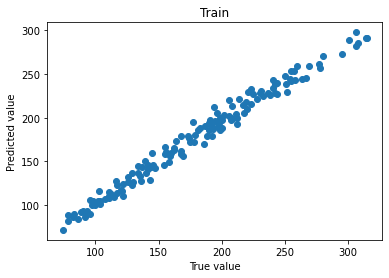

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7041169434785843
MAE:  6.332876464843751
MSE:  84.70585891118485


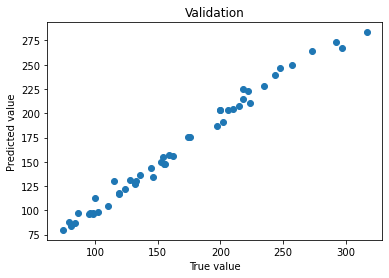

Epoch:  34
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.3615890390177568
MAE:  6.3143081380208335
MSE:  71.89648261946678


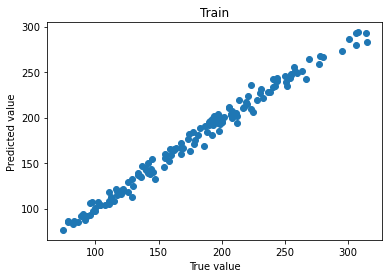

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.9260409200191497
MAE:  8.74014208984375
MSE:  116.24182705314493


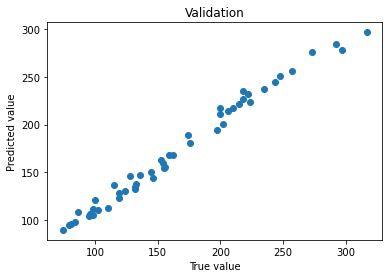

Epoch:  35
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.3462244228521983
MAE:  7.305216992187501
MSE:  85.5996512948704


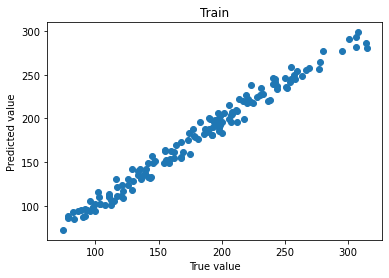

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7365036144852638
MAE:  4.71940654296875
MSE:  40.900898216253744


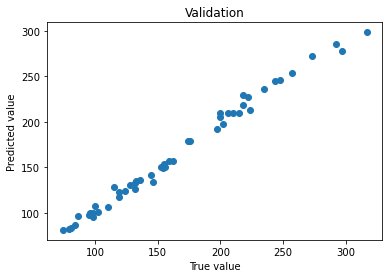

Epoch:  36
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.3190768973529339
MAE:  6.445877669270833
MSE:  75.68870608422915


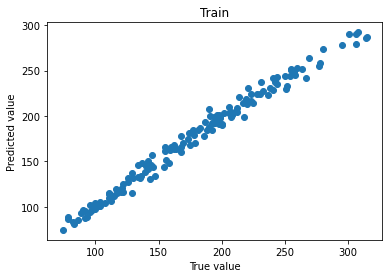

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.6988911318778992
MAE:  5.832554589843749
MSE:  58.93607684251639


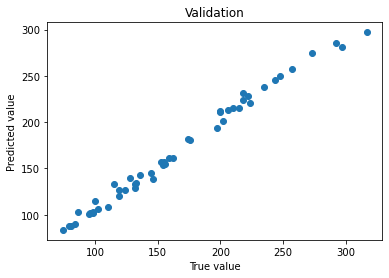

Epoch:  37
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.30471181258559227
MAE:  6.705334407552083
MSE:  76.13068627109546


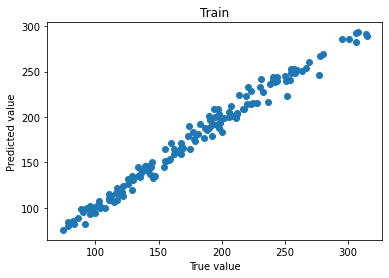

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.6789524552226066
MAE:  5.329846679687501
MSE:  53.82024973652938


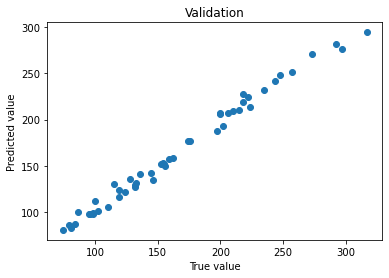

Epoch:  38
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.297700021614631
MAE:  5.492197884114585
MSE:  59.21421040904444


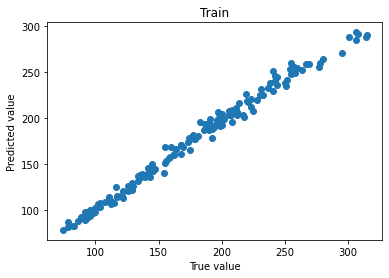

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7809527397155762
MAE:  5.845169628906251
MSE:  61.91596036128281


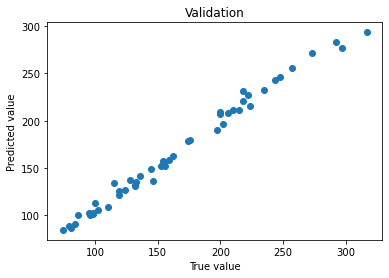

Epoch:  39
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.25625454728802044
MAE:  5.116426041666667
MSE:  47.59215395065404


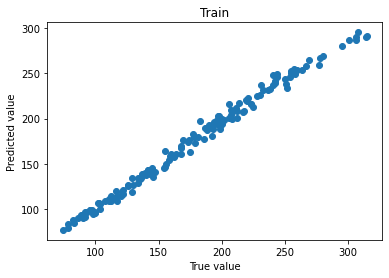

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7394905906915664
MAE:  5.176998925781249
MSE:  52.49401406076478


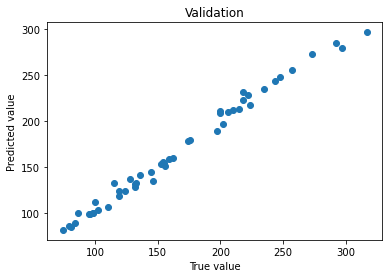

Epoch:  40
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.2444522395233313
MAE:  5.110810319010415
MSE:  47.493112127183394


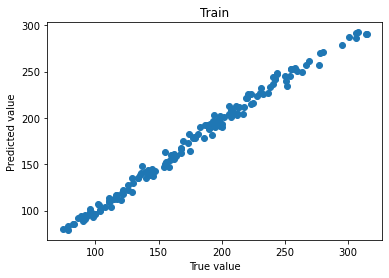

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.6947703006863594
MAE:  6.225948535156249
MSE:  70.81749715366028


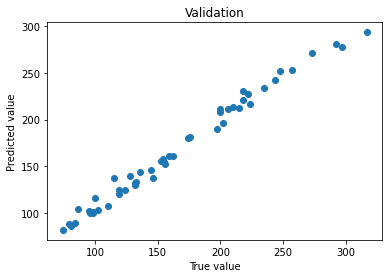

Epoch:  41
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.24685909152030944
MAE:  5.007825227864584
MSE:  46.552523623963204


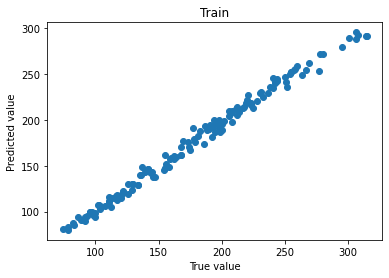

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7267273563146591
MAE:  5.304613671874998
MSE:  51.63818512129306


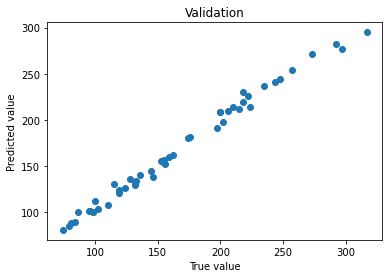

Epoch:  42
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.23479561895132064
MAE:  4.793345800781251
MSE:  45.34771190364473


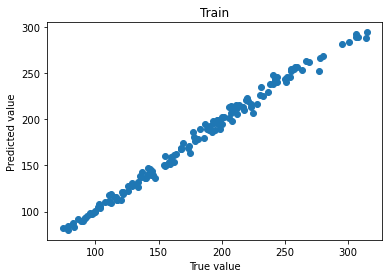

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7746839368343353
MAE:  5.7492015625
MSE:  62.97532713624095


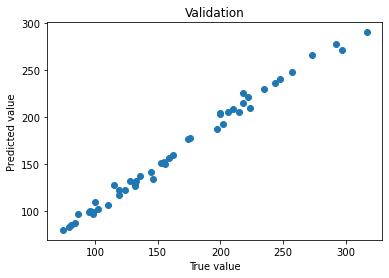

Epoch:  43
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.22369963705539703
MAE:  4.8652115234375
MSE:  46.26489862336415


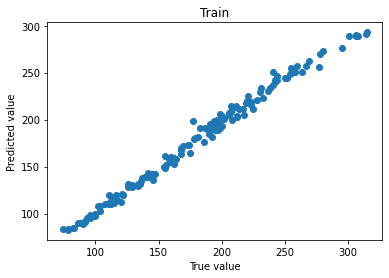

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7296470454335213
MAE:  6.2406451171874995
MSE:  71.32107436896993


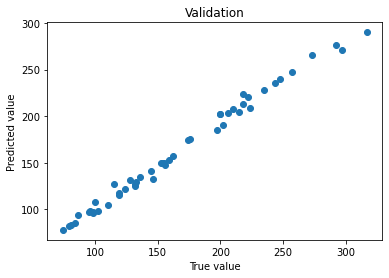

Epoch:  44
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.2077762121707201
MAE:  4.980379524739583
MSE:  45.59643303678147


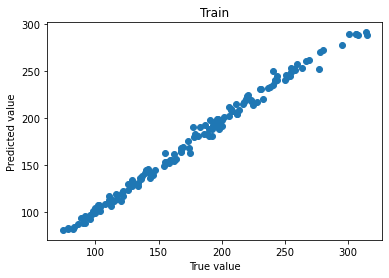

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.730178182721138
MAE:  5.424255761718752
MSE:  56.21833821556904


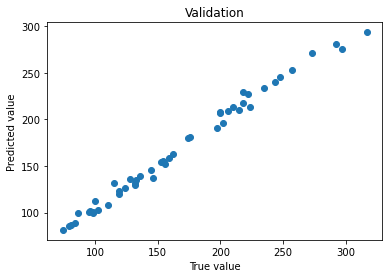

Epoch:  45
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.20872983132799466
MAE:  4.629995572916667
MSE:  42.07738847533544


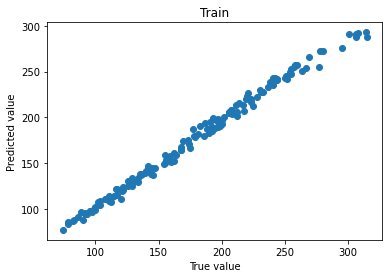

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7281688910722732
MAE:  5.176555273437498
MSE:  53.55851137926578


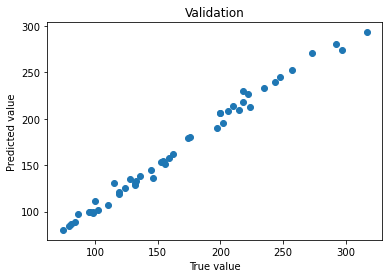

Epoch:  46
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.20101779371500014
MAE:  4.407865234375
MSE:  37.59691807609813


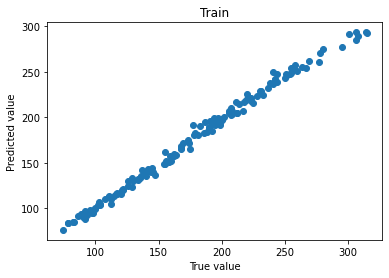

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7017460545897484
MAE:  5.269173632812499
MSE:  55.01285184216784


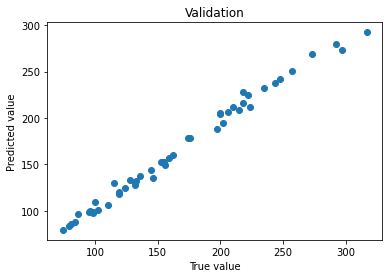

Epoch:  47
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.19455880927542846
MAE:  4.273593652343751
MSE:  36.086158469630085


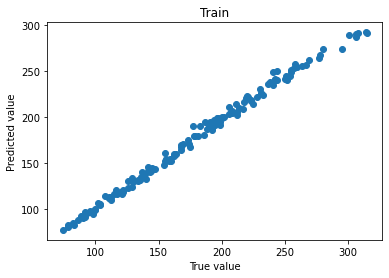

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7196079829335212
MAE:  5.3651178710937515
MSE:  56.399772034727604


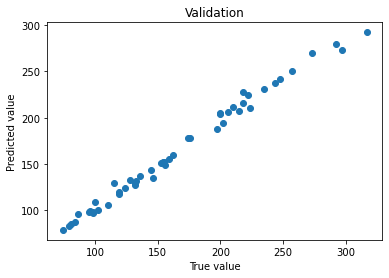

Epoch:  48
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.19080799907445908
MAE:  4.273583463541667
MSE:  36.02651010778777


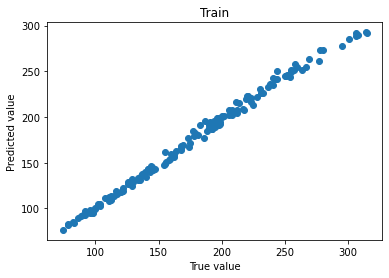

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7401345011591911
MAE:  5.178356347656253
MSE:  53.03525366101886


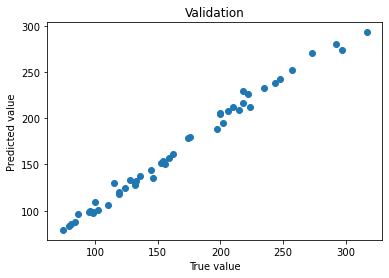

Epoch:  49
Training: 


C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-6-ad1c947f16f0>:28: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 5)



Mean Loss:  0.1976945840815703
MAE:  4.259149804687501
MSE:  35.66456969238092


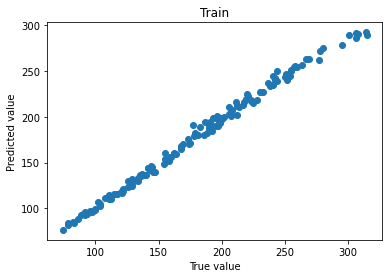

Validation: 


<ipython-input-6-ad1c947f16f0>:58: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True).cuda()
<ipython-input-6-ad1c947f16f0>:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label, volatile=True).cuda()
C:\Users\hicks\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1, 1, 256, 256])) that is different to the input size (torch.Size([1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Mean Loss:  0.7380678644776344
MAE:  5.2026553710937495
MSE:  53.33836993841026


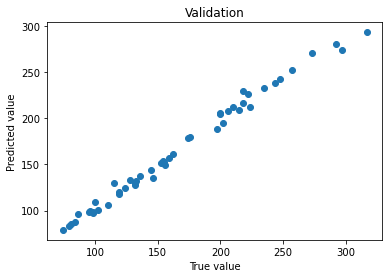

In [8]:
from base import data_loader
from base import train
from torch.autograd import Variable


data_loader = train.get_loader('cell', batch_size=1, horizontal_flip = 0.5, vertical_flip = 0.5)

train_queue = data_loader['train']
valid_queue = data_loader['valid']
model = model.cuda()

epochs = 50

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, float(epochs))

for epoch in range(epochs):
    
    print("Epoch: ", epoch)
    
    train_model(train_queue, model, criterion, optimizer)
    validate_model(valid_queue, model, criterion)
    
    scheduler.step()